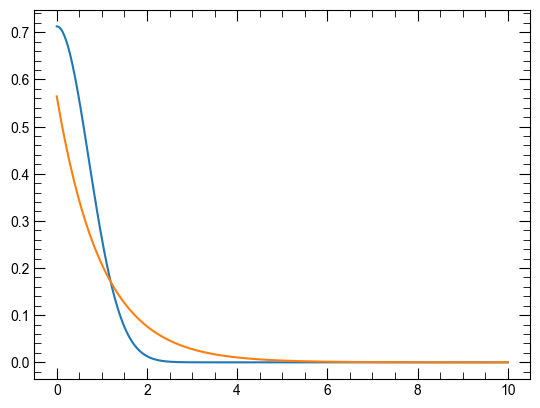

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.optimize import minimize


def phi_gf(alpha, r):
    return np.exp(-alpha * r**2) * (2 * alpha / np.pi) ** (3 / 4)


def phi_sf(zeta, r):
    return np.exp(-zeta * r) * (zeta**3 / np.pi) ** (1 / 2)


x = np.linspace(0, 10, 500)  # 精度を向上させるために分割数を増やす
y = phi_gf(1, x)
y2 = phi_sf(1, x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y2)

In [69]:
def diff(alpha):
    if alpha <= 0:  # alphaが0以下の場合は大きな値を返して最適化から除外
        return np.inf
    return simpson((phi_gf(alpha, x) - phi_sf(1, x)) ** 2 * 4 * np.pi * x**2, x)


initial_alpha = 1  # 初期値
result = minimize(diff, x0=initial_alpha, bounds=[(0.001, 5)])  # 最適化の範囲を指定
print(result.x)

[0.27094981]


/tmp/ipykernel_121484/4153748773.py:4: DeprecationWarning: You are passing x=[ 0.          0.02004008  0.04008016  0.06012024  0.08016032  0.1002004
  0.12024048  0.14028056  0.16032064  0.18036072  0.2004008   0.22044088
  0.24048096  0.26052104  0.28056112  0.3006012   0.32064128  0.34068136
  0.36072144  0.38076152  0.4008016   0.42084168  0.44088176  0.46092184
  0.48096192  0.501002    0.52104208  0.54108216  0.56112224  0.58116232
  0.6012024   0.62124248  0.64128257  0.66132265  0.68136273  0.70140281
  0.72144289  0.74148297  0.76152305  0.78156313  0.80160321  0.82164329
  0.84168337  0.86172345  0.88176353  0.90180361  0.92184369  0.94188377
  0.96192385  0.98196393  1.00200401  1.02204409  1.04208417  1.06212425
  1.08216433  1.10220441  1.12224449  1.14228457  1.16232465  1.18236473
  1.20240481  1.22244489  1.24248497  1.26252505  1.28256513  1.30260521
  1.32264529  1.34268537  1.36272545  1.38276553  1.40280561  1.42284569
  1.44288577  1.46292585  1.48296593  1.50300601

In [70]:
result.x

array([0.27094981])

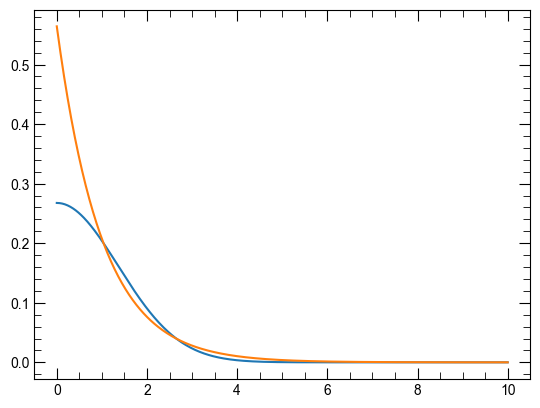

In [72]:
x = np.linspace(0, 10, 500)  # 精度を向上させるために分割数を増やす
y = phi_gf(result.x[0], x)
y2 = phi_sf(1, x)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y2)